In [1]:
!pip freeze

antgen==0.0.9
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
attrs==22.1.0
backcall==0.2.0
beautifulsoup4==4.11.1
bitarray==2.6.0
bleach==5.0.1
certifi==2022.9.24
cffi==1.15.1
charset-normalizer==2.1.1
cloudpickle==2.2.0
colorama==0.4.5
cycler==0.11.0
dask==2022.2.0
debugpy==1.6.3
decorator==5.1.1
defusedxml==0.7.1
entrypoints==0.4
fastjsonschema==2.16.2
fonttools==4.37.4
fsspec==2022.8.2
h5py==3.7.0
idna==3.4
importlib-metadata==5.0.0
importlib-resources==5.9.0
ipykernel==6.16.0
ipython==7.34.0
ipython-genutils==0.2.0
ipywidgets==8.0.2
jedi==0.18.1
Jinja2==3.1.2
jsonschema==4.16.0
jupyter==1.0.0
jupyter-console==6.4.4
jupyter-core==4.11.1
jupyter_client==7.3.5
jupyterlab-pygments==0.2.2
jupyterlab-widgets==3.0.3
kiwisolver==1.4.4
locket==1.0.0
lxml==4.9.1
MarkupSafe==2.1.1
matplotlib==3.5.3
matplotlib-inline==0.1.6
mistune==2.0.4
nbclient==0.6.8
nbconvert==7.1.0
nbformat==5.6.1
nest-asyncio==1.5.6
notebook==6.4.12
numpy==1.21.6
packaging==21.3
pandas==1.3.4
pandocfilters==1.5.0
pars

In [2]:
!pip install -i https://test.pypi.org/simple/ procsimulator==0.0.4

Looking in indexes: https://test.pypi.org/simple/
     ---------------------------------------- 9.8/9.8 MB 6.4 MB/s eta 0:00:00


In [35]:
import procsimulator

In [36]:
from procsimulator.CommunityGenerator import CommunityGenerator
from procsimulator.ConsumptionGenerator import ConsumptionGenerator

In [37]:
import os
current_path = os.getcwd()
print(current_path)

C:\Users\Nuno.Velosa.CORP\OneDrive - Unipartner IT Services, S.A\Desktop\eso_project


Creating simulation files for each user
Creating simulation file for users of house 0
Creating simulation file for user Ann
Creating simulation file for user baseload
Creating simulation file for users of house 1
Creating simulation file for user Ann
Creating simulation file for user baseload
Creating simulation file for users of house 2
Creating simulation file for user Ann
Creating simulation file for user Bill
Creating simulation file for user baseload
Creating simulation file for users of house 3
Creating simulation file for user Ann
Creating simulation file for user Bill
Creating simulation file for user John
Creating simulation file for user Toby
Creating simulation file for user baseload
Creating simulation file for users of house 4
Creating simulation file for user Ann
Creating simulation file for user Bill
Creating simulation file for user John
Creating simulation file for user baseload
Creating simulation files for each house
Creating simulation file for house 0
Creating simu

Resampling the data of file total.csv of house 3
Resampling the data of file TV.csv of house 3
Resampling the data of file use_a_personal_computer.csv of house 3
Resampling the data of file VACUUMCLEANER.csv of house 3
Resampling the data of file vacuuming.csv of house 3
Resampling the data of file WASHINGMACHINE.csv of house 3
Resampling the data of file washing_a_load_of_laundry.csv of house 3
Resampling the data of file watching_TV.csv of house 3
Resampling the files of HOUSE 4
Resampling the data of file AMPLIFIER.csv of house 4
Resampling the data of file Ann.csv of house 4
Resampling the data of file baseload.csv of house 4
Resampling the data of file Bill.csv of house 4
Resampling the data of file BREADCUTTER.csv of house 4
Resampling the data of file CDPLAYER.csv of house 4
Resampling the data of file COFFEEMAKER.csv of house 4
Resampling the data of file COOKINGSTOVE.csv of house 4
Resampling the data of file cooking_a_dinner.csv of house 4
Resampling the data of file DISHWASH

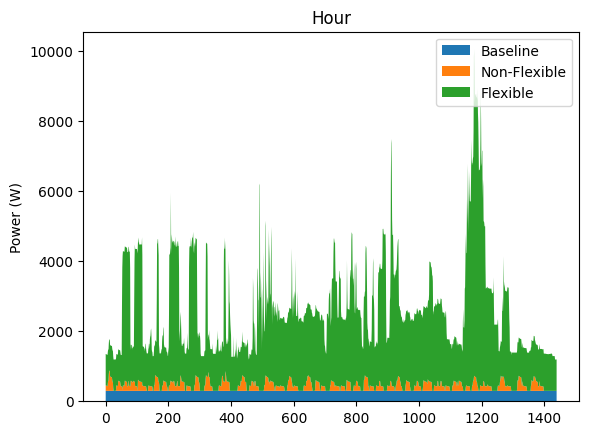

In [38]:
path_steps_seconds = os.path.join(current_path, "output/house")
path_steps_minutes = "output/minute"
path_steps_after_first = "output/afteroptimization"
path_steps_after_second = "output/aftersecoptimization"

config_files_path = "output/house"

cg = ConsumptionGenerator("data.json", path_steps_seconds, path_steps_minutes)
cg.execute("1", "houses", True, False)

Renewable Energy Generator
Calculating the contracted power of the community
energy contracted: 14950.0


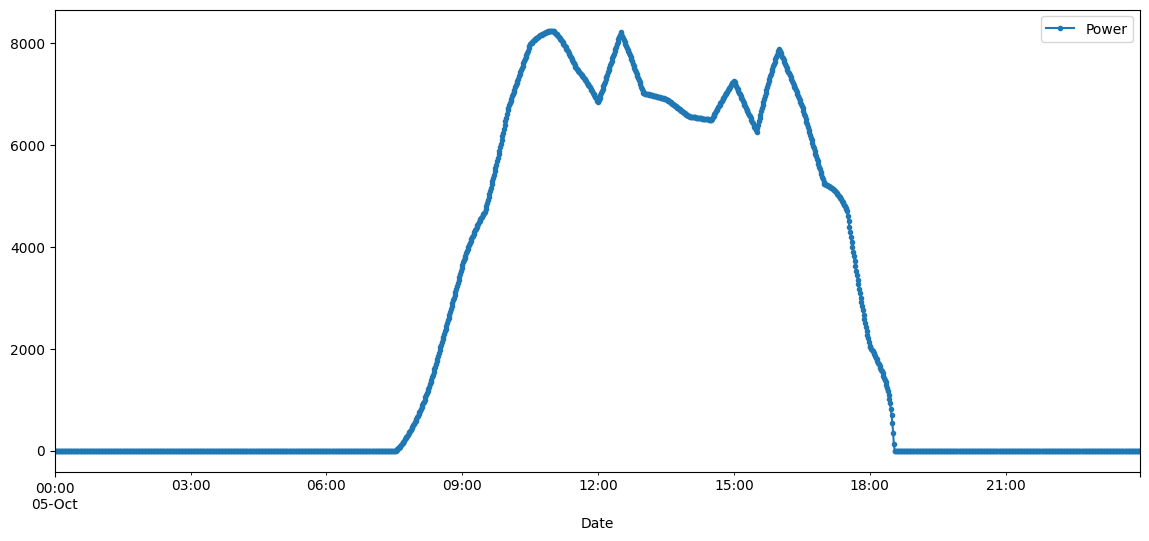

In [39]:
from procsimulator.DataFromSmile import DataFromSmile
from procsimulator.RenewableEnergyGenerator import RenewableEnergyGenerator

dat = DataFromSmile("https://ems.prsma.com/solcast/public/Fazendinha_solcast-radiation-historical_30min.csv")
reg = RenewableEnergyGenerator(cg, dat, cg.path_steps_minutes)

reg.execute()

In [40]:
from procsimulator.CommunityGenerator import CommunityGenerator

cmg = CommunityGenerator(cg.path_steps_seconds, cg.path_steps_minutes)
cmg.execute()

Calculating netload of the community


In [41]:
# Getting the community contracted power
community = cg.get_community()
print("Contracted Power: " + str(cg.calculate_contracted_power(community)))

Calculating the contracted power of the community
Contracted Power: 29900.0


In [42]:
# Getting timeslots/activities
cg.get_timeslots(community, True)

Creating the Timeslots of the community


[{'Start': '2022-10-05 11:45:00',
  'End': '2022-10-05 11:57:00',
  'Duration': '12',
  'max_power': 1136.3266666666668,
  'Power': 702.8516666666667,
  'Appliance': 'VACUUMCLEANER',
  'House': 0},
 {'Start': '2022-10-05 19:05:00',
  'End': '2022-10-05 19:17:00',
  'Duration': '12',
  'max_power': 1135.0883333333334,
  'Power': 949.4716666666668,
  'Appliance': 'VACUUMCLEANER',
  'House': 0},
 {'Start': '2022-10-05 04:26:00',
  'End': '2022-10-05 07:36:00',
  'Duration': '10',
  'max_power': 2935.0,
  'Power': 41.25,
  'Appliance': 'WASHINGMACHINE',
  'House': 0},
 {'Start': '2022-10-05 07:49:00',
  'End': '2022-10-05 07:55:00',
  'Duration': '6',
  'max_power': 897.0,
  'Power': 612.95,
  'Appliance': 'COOKINGSTOVE',
  'House': 0},
 {'Start': '2022-10-05 19:37:00',
  'End': '2022-10-05 20:37:00',
  'Duration': '0',
  'max_power': 897.0,
  'Power': 299.0,
  'Appliance': 'COOKINGSTOVE',
  'House': 0},
 {'Start': '2022-10-05 14:43:00',
  'End': '2022-10-05 14:55:00',
  'Duration': '12',


In [43]:
from procsimulator.CommunityManagerStrategy import CommunityManagerStrategy

cm = CommunityManagerStrategy(cg, cg.path_steps_minutes, path_steps_after_first, path_steps_after_second)
cm.execute()

Optimization the community using the implemented strategy
Creating the Timeslots of the community
Getting the flexibility power of each house
Calculating the contracted power of the community
Timeslots List
{'Start': '2022-10-05 11:45:00', 'End': '2022-10-05 11:57:00', 'Duration': '12', 'max_power': 1136.3266666666668, 'Power': 702.8516666666667, 'Appliance': 'VACUUMCLEANER', 'House': 0}
{'Start': '2022-10-05 19:05:00', 'End': '2022-10-05 19:17:00', 'Duration': '12', 'max_power': 1135.0883333333334, 'Power': 949.4716666666668, 'Appliance': 'VACUUMCLEANER', 'House': 0}
{'Start': '2022-10-05 04:26:00', 'End': '2022-10-05 07:36:00', 'Duration': '10', 'max_power': 2935.0, 'Power': 41.25, 'Appliance': 'WASHINGMACHINE', 'House': 0}
{'Start': '2022-10-05 07:49:00', 'End': '2022-10-05 07:55:00', 'Duration': '6', 'max_power': 897.0, 'Power': 612.95, 'Appliance': 'COOKINGSTOVE', 'House': 0}
{'Start': '2022-10-05 19:37:00', 'End': '2022-10-05 20:37:00', 'Duration': '0', 'max_power': 897.0, 'Power

Creating the Timeslots of the community
Community Flexibilities (2nd):
[['0.5'], ['0.5', '0.5'], ['5.0', '5.0', '5.0', '5.0', '5.0'], ['0.5', '0.5'], ['1.0', '1.0', '1.0', '1.0'], ['0.1'], ['0.1'], ['1.0', '1.0'], ['0.8']]
Bin Capacities (2nd):
[25415.0, 25415.0, 25415.0, 25415.0, 25415.0, 25415.0, 25415.0, 25541.254744277994, 27406.885909121764, 28757.66406369173, 30626.306289408552, 31060.023110888345, 30578.458507845815, 30441.198763899065, 31311.145140512846, 31318.807135962456, 31322.17761408921, 28812.973717005785, 26082.589293012865, 25415.0, 25415.0, 25415.0, 25415.0, 25415.0]
Bin Maximum (2nd):
[24363.3, 24374.533333333333, 24379.246666666666, 24405.523333333334, 24092.795, 24399.973333333335, 24520.0, 24961.93249173241, 27345.07355257882, 30632.58999866473, 30804.9637223162, 31292.47691884492, 27828.39819186981, 28876.80441040609, 30406.888906807744, 30969.75353209664, 31001.914543382838, 28281.155976664377, 25245.292228955557, 23433.771666666667, 24331.696666666667, 24072.64

In [44]:
import pandas as pd

# Getting the consumption profiles before the optimization
before_opt = pd.read_csv(path_steps_minutes + '/netload.csv', sep=';')
before_opt.columns = ['Date', 'Demand', 'Production', 'Netload']
before_opt['Date'] = pd.to_datetime(before_opt['Date'])
before_opt.set_index('Date')

,Demand,Production,Netload
Date,,,
2022-10-05 00:00:00,1051.700000,0.0,1051.700000
2022-10-05 00:01:00,1051.630000,0.0,1051.630000
2022-10-05 00:02:00,1044.668333,0.0,1044.668333
2022-10-05 00:03:00,1038.121667,0.0,1038.121667
2022-10-05 00:04:00,1033.938333,0.0,1033.938333
...,...,...,...
2022-10-05 23:54:00,895.000000,0.0,895.000000
2022-10-05 23:55:00,895.000000,0.0,895.000000
2022-10-05 23:56:00,895.000000,0.0,895.000000


In [45]:
# Getting the consumption profiles after the 1st step of the optimization
first_opt = pd.read_csv(path_steps_after_first + '/netload.csv', sep=';')
first_opt.columns = ['Date', 'Demand', 'Production', 'Netload']
first_opt['Date'] = pd.to_datetime(first_opt['Date'])
first_opt.set_index('Date')

,Demand,Production,Netload
Date,,,
2022-10-05 00:00:00,1051.700000,0.0,1051.700000
2022-10-05 00:01:00,1051.630000,0.0,1051.630000
2022-10-05 00:02:00,1044.668333,0.0,1044.668333
2022-10-05 00:03:00,1038.121667,0.0,1038.121667
2022-10-05 00:04:00,1033.938333,0.0,1033.938333
...,...,...,...
2022-10-05 23:54:00,895.000000,0.0,895.000000
2022-10-05 23:55:00,895.000000,0.0,895.000000
2022-10-05 23:56:00,895.000000,0.0,895.000000


In [46]:
# Getting the consumption profiles after the 2nd step of the optimization
second_opt = pd.read_csv(path_steps_after_second + '/netload.csv', sep=';')
second_opt.columns = ['Date', 'Demand', 'Production', 'Netload']
second_opt['Date'] = pd.to_datetime(second_opt['Date'])
second_opt.set_index('Date')

,Demand,Production,Netload
Date,,,
2022-10-05 00:00:00,1051.700000,0.0,1051.700000
2022-10-05 00:01:00,1051.630000,0.0,1051.630000
2022-10-05 00:02:00,1044.668333,0.0,1044.668333
2022-10-05 00:03:00,1038.121667,0.0,1038.121667
2022-10-05 00:04:00,1033.938333,0.0,1033.938333
...,...,...,...
2022-10-05 23:54:00,895.000000,0.0,895.000000
2022-10-05 23:55:00,895.000000,0.0,895.000000
2022-10-05 23:56:00,895.000000,0.0,895.000000


In [47]:
from procsimulator.Evaluation import Evaluation

# Defining evaluation for the three different phases (dataframes): before the optimization, after the 1st step and after the 2nd step
ev_before = Evaluation(reg, before_opt, cm.production_baseload)
ev_first = Evaluation(reg, first_opt, cm.production_baseload)
ev_second = Evaluation(reg, second_opt, cm.production_baseload)

In [48]:
def show_timeslots_placement_graph(path):
    abc = pd.read_csv(path + '/netload.csv', sep=';')
    abc.columns = ['Date', 'Demand', 'Production', 'Netload']
    abc.drop('Netload', inplace=True, axis=1)
    abc.drop('Demand', inplace=True, axis=1)
    # abc.drop('Production', inplace=True, axis=1)

    abc.set_index('Date')

    tim2 = pd.read_csv(path + '/house0/WASHINGMACHINE.csv', sep=';')
    # tim2['Power'] = tim2['Power'] + 62.1 * 30;
    tim2 = tim2.rename(columns={"Power": "Timeslot 2 - Washing Machine - House 1"})
    tim2.set_index('Date')

    tim25 = pd.read_csv(path + '/house3/DISHWASHER.csv', sep=';')
    # tim10['Power'] = tim10['Power'] + 62.1 * 30
    tim25 = tim25.rename(columns={"Power": "Timeslot 25 - Dishwasher - House 6"})
    tim25.set_index('Date')

    tim33 = pd.read_csv(path + '/house4/WASHINGMACHINE.csv', sep=';')
    # tim33['Power'] = tim33['Power'] + 62.1 * 30
    tim33 = tim33.rename(columns={"Power": "Timeslot 33 - Washing Machine - House 7"})
    tim33.set_index('Date')

    df = pd.merge(pd.merge(pd.merge(abc, tim2, on='Date', how='left'), tim25, on='Date', how='left'), tim33, on='Date',
                  how='left')
    df.set_index('Date')

    df['Time'] = df['Date'].map(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").strftime("%H:%M"))

    df.plot(x="Time", y=["Production", "Timeslot 2 - Washing Machine - House 1", "Timeslot 25 - Dishwasher - House 6",
                         "Timeslot 33 - Washing Machine - House 7"], kind="line", figsize=(10, 10))

    # plt.xlim(0, 60*24)
    # plt.ylim(0, 4500)
    plt.ylabel('Power')
    plt.xlabel('Time')

    # abc.plot(x="Date", y=["Netload"], kind="line", figsize=(10, 10))
    plt.show()

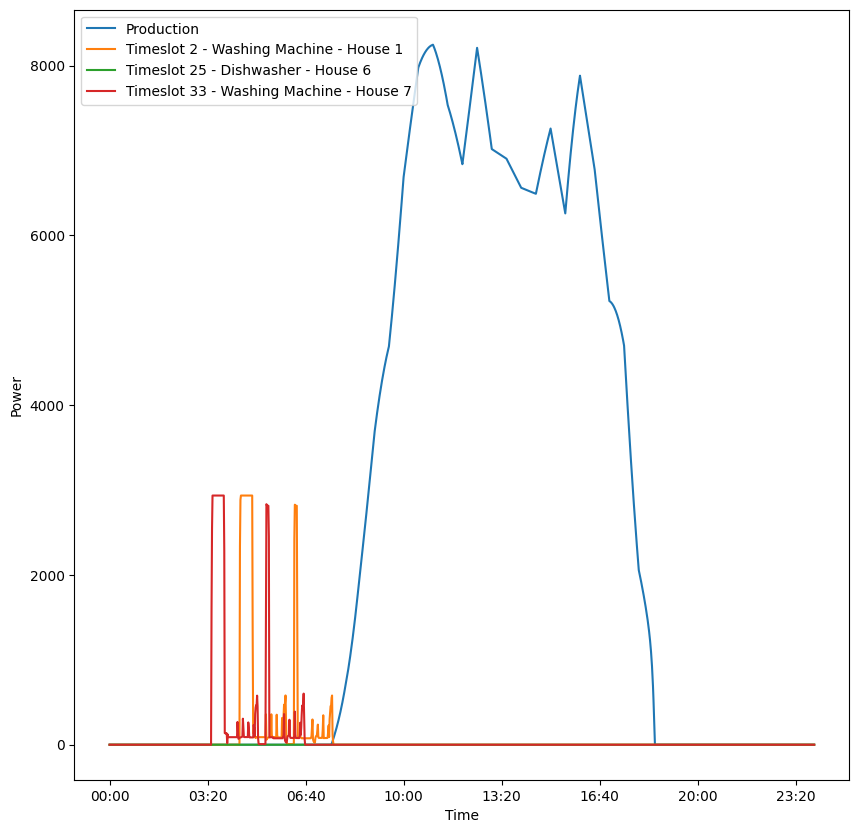

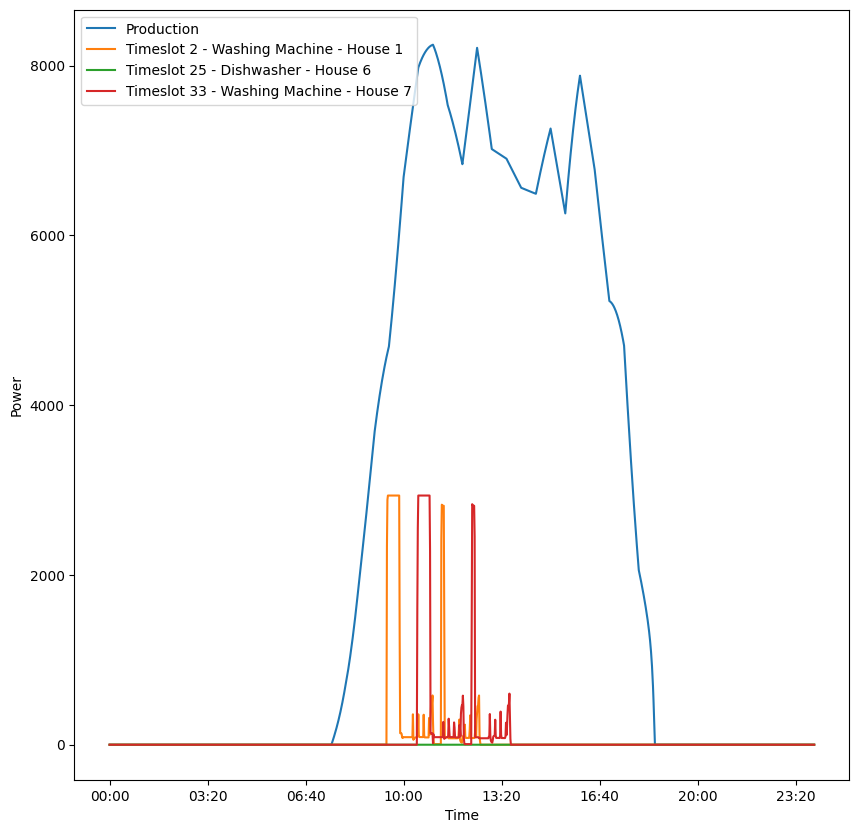

In [49]:
import datetime
import matplotlib.pyplot as plt

# Graphically show some timeslots placement using different flexibilities with just 1 y-axis
show_timeslots_placement_graph(path_steps_minutes)
show_timeslots_placement_graph(path_steps_after_second)

In [50]:
def show_timeslots_placement_graph_double(path):
    abc = pd.read_csv(path + '/netload.csv', sep=';')
    abc.columns = ['Date', 'Demand', 'Production', 'Netload']
    abc.drop('Netload', inplace=True, axis=1)
    abc.drop('Demand', inplace=True, axis=1)
    # abc.drop('Production', inplace=True, axis=1)

    abc.set_index('Date')

    tim2 = pd.read_csv(path + '/house0/WASHINGMACHINE.csv', sep=';')
    # tim2['Power'] = tim2['Power'] + 62.1 * 30;
    tim2 = tim2.rename(columns={"Power": "Timeslot 2 - Washing Machine - House 1"})
    tim2.set_index('Date')

    tim25 = pd.read_csv(path + '/house3/DISHWASHER.csv', sep=';')
    # tim10['Power'] = tim10['Power'] + 62.1 * 30
    tim25 = tim25.rename(columns={"Power": "Timeslot 25 - Dishwasher - House 6"})
    tim25.set_index('Date')

    tim33 = pd.read_csv(path + '/house4/WASHINGMACHINE.csv', sep=';')
    # tim33['Power'] = tim33['Power'] + 62.1 * 30
    tim33 = tim33.rename(columns={"Power": "Timeslot 33 - Washing Machine - House 7"})
    tim33.set_index('Date')

    df = pd.merge(pd.merge(pd.merge(abc, tim2, on='Date', how='left'), tim25, on='Date', how='left'), tim33, on='Date',
                  how='left')
    df.set_index('Date')

    df['Time'] = df['Date'].map(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").strftime("%H:%M"))

    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Power (W)', color='red')
    plt1 = ax1.plot(df['Time'], df["Timeslot 2 - Washing Machine - House 1"], color='red',
                    label='Timeslot 2 - Washing Machine - House 1')
    plt2 = ax1.plot(df['Time'], df["Timeslot 25 - Dishwasher - House 6"], color='green',
                    label='Timeslot 25 - Dishwasher - House 6')
    plt3 = ax1.plot(df['Time'], df["Timeslot 33 - Washing Machine - House 7"], color='orange',
                    label='Timeslot 33 - Washing Machine - House 7')
    ax1.axis(ymin=-280, ymax=6000)
    # ax1.set_xticks(df['Time'])
    # ax1.tick_params(axis='y', labelcolor='red')

    # Adding Twin Axes

    ax2 = ax1.twinx()

    ax2.set_ylabel('Production (W)', color='blue')
    plt4 = ax2.plot(df['Time'], df["Production"], color='blue', label='Production')

    # adds space between x values because there are a lot of different values for the x-axis and not all of them can be displayed
    # ref. https://stackoverflow.com/questions/48251417/matplotlib-plots-multiple-dark-lines-on-x-axis
    spacing = 200
    visible = ax1.xaxis.get_ticklabels()[::spacing]
    for label in ax1.xaxis.get_ticklabels():
        if label not in visible:
            label.set_visible(False)
    visible = ax1.xaxis.get_ticklines()[::spacing]
    for label in ax1.xaxis.get_ticklines():
        if label not in visible:
            label.set_visible(False)

    # ax.get_xaxis().set_visible(False)
    # Show plot

    # join labels of both axis (ax1 and ax2)
    plts = plt1 + plt2 + plt3 + plt4
    labs = [l.get_label() for l in plts]
    ax1.legend(plts, labs, loc=0)

    plt.show()

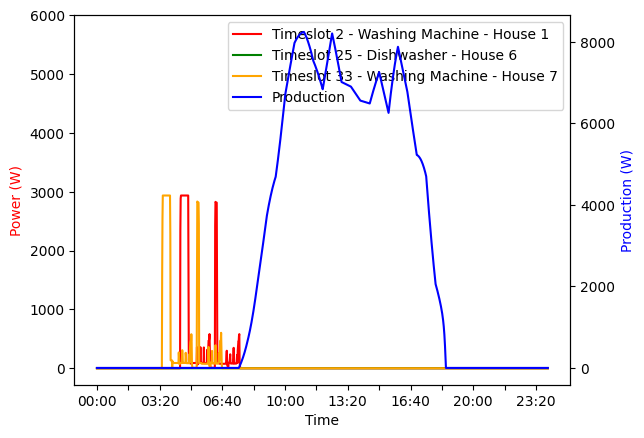

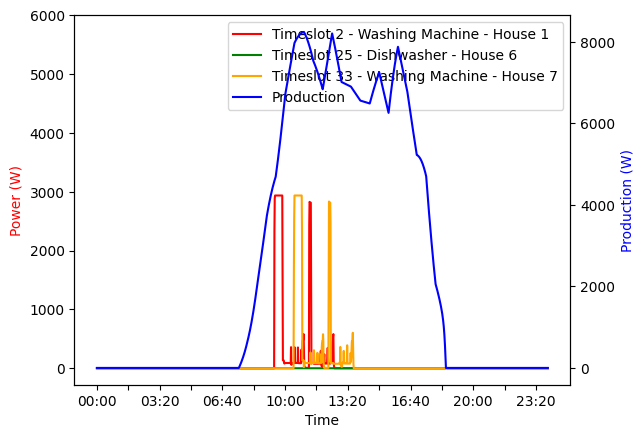

In [51]:
# Graphically show some timeslots placement using different flexibilities with 2 y-axis
show_timeslots_placement_graph_double(path_steps_minutes)
show_timeslots_placement_graph_double(path_steps_after_second)

In [52]:
def show_flexibility_evolution_graph(path):

    # fig, ax1 = plt.subplots()
    fig, axes = plt.subplots(nrows=2, ncols=2, constrained_layout=True, )

    for p in range(2):
        for j in range(2):

            abc = pd.read_csv(path[p][j] + '/netload.csv', sep=';')
            abc.columns = ['Date', 'Demand', 'Production', 'Netload']
            abc.drop('Netload', inplace=True, axis=1)
            abc.drop('Demand', inplace=True, axis=1)
            # abc.drop('Production', inplace=True, axis=1)

            abc.set_index('Date')

            tim2 = pd.read_csv(path[p][j] + '/house0/WASHINGMACHINE.csv', sep=';')
            # tim2['Power'] = tim2['Power'] + 62.1 * 30;
            tim2 = tim2.rename(columns={"Power": "Timeslot 2 - Washing Machine - House 1"})
            tim2.set_index('Date')

            tim25 = pd.read_csv(path[p][j] + '/house3/DISHWASHER.csv', sep=';')
            # tim10['Power'] = tim10['Power'] + 62.1 * 30
            tim25 = tim25.rename(columns={"Power": "Timeslot 25 - Dishwasher - House 6"})
            tim25.set_index('Date')

            tim33 = pd.read_csv(path[p][j] + '/house4/WASHINGMACHINE.csv', sep=';')
            # tim33['Power'] = tim33['Power'] + 62.1 * 30
            tim33 = tim33.rename(columns={"Power": "Timeslot 33 - Washing Machine - House 7"})
            tim33.set_index('Date')

            df = pd.merge(pd.merge(pd.merge(abc, tim2, on='Date', how='left'), tim25, on='Date', how='left'), tim33,
                          on='Date',
                          how='left')
            df.set_index('Date')

            df['Time'] = df['Date'].map(
                lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").strftime("%H:%M"))

            axes[p, j].set_xlabel('Time')
            axes[p, j].set_ylabel('Power (W)', color='red')
            plt1 = axes[p, j].plot(df['Time'], df["Timeslot 2 - Washing Machine - House 1"], color='red',
                                   label='Timeslot 2 - Washing Machine - House 1')
            plt2 = axes[p, j].plot(df['Time'], df["Timeslot 25 - Dishwasher - House 6"], color='green',
                                   label='Timeslot 25 - Dishwasher - House 6')
            plt3 = axes[p, j].plot(df['Time'], df["Timeslot 33 - Washing Machine - House 7"], color='orange',
                                   label='Timeslot 33 - Washing Machine - House 7')
            axes[p, j].axis(ymin=-280, ymax=7500)
            # ax1.set_xticks(df['Time'])
            # ax1.tick_params(axis='y', labelcolor='red')

            # Adding Twin Axes

            ax2 = axes[p, j].twinx()

            ax2.set_ylabel('Production (W)', color='blue')
            plt4 = ax2.plot(df['Time'], df["Production"], color='blue', label='Production')

            # ax1.get_shared_y_axes().join(ax1, ax3)

            # adds space between x values because there are a lot of different values for the x-axis and not all of them can be displayed
            # ref. https://stackoverflow.com/questions/48251417/matplotlib-plots-multiple-dark-lines-on-x-axis
            spacing = 500
            visible = axes[p, j].xaxis.get_ticklabels()[::spacing]
            for label in axes[p, j].xaxis.get_ticklabels():
                if label not in visible:
                    label.set_visible(False)
            visible = axes[p, j].xaxis.get_ticklines()[::spacing]
            for label in axes[p, j].xaxis.get_ticklines():
                if label not in visible:
                    label.set_visible(False)

            # join labels of both axis (ax1 and ax2)
            plts = plt1 + plt2 + plt3 + plt4
            labs = [l.get_label() for l in plts]
            axes[p, j].legend(plts, labs, loc=2, prop={'size': 6})

        # ax.get_xaxis().set_visible(False)
        # Show plot

    axes[0, 0].set_title("A) Flexibility of 25%")
    axes[0, 1].set_title("B) Flexibility of 50%")
    axes[1, 0].set_title("C) Flexibility of 75%")
    axes[1, 1].set_title("D) Flexibility of 100%")

    plt.show()

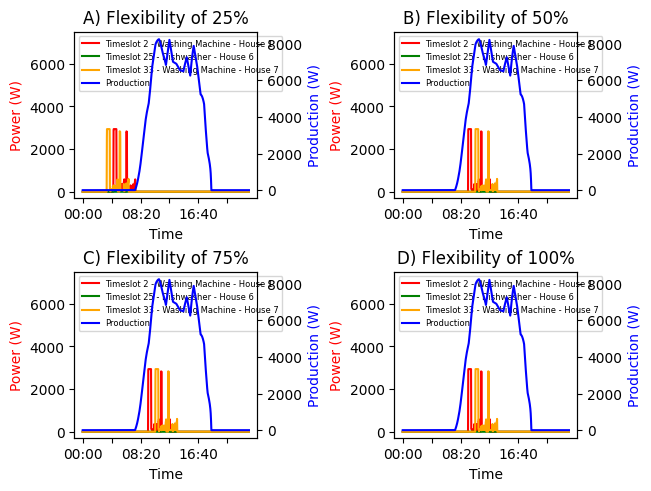

In [53]:
# Graphically show flexibility evolution graph (the impact of the optimization when considering 4 flexibility cases: 25%, 50%, 75% and 100%
path = [[path_steps_minutes, path_steps_after_first],[path_steps_after_second,path_steps_after_second]]
show_flexibility_evolution_graph(path)

In [54]:
def calculate_phase_metrics(phase, ev, placed_timeslots, not_placed_timeslots, all_timeslots):

  print(phase)
  print("Average Power used from Grid: " + str(ev.get_average_power_used_from_grid()))
  print("Average Power not used from PV: " + str(ev.get_average_power_not_used_from_pv()))
  print("Average Power used from PV: " + str(ev.get_average_power_used_from_pv()))
  print("Energy used from Grid: " + str(ev.get_energy_used_from_grid()))
  print("Energy not used from PV: " + str(ev.get_energy_not_used_from_pv()))
  print("Energy used from PV: " + str(ev.get_energy_used_from_pv()))
  print("Maximum Grid Peak: " + str(ev.get_maximum_grid_peak()))
  print("Minimum Grid Peak: " + str(ev.get_minimum_grid_peak()))
  print("Maximum Magnitude Peak: " + str(ev.get_maximum_magnitude_peak()))
  print("Minimum Magnitude Peak: " + str(ev.get_minimum_magnitude_peak()))
  print("Number of Peaks: " + str(ev.get_peaks_number()))
  print("Self Sufficiency (%): " + str(ev.get_self_sufficiency()))
  print("Self Consumption (%): " + str(ev.get_self_consumption()))

  if (phase == "Before Optimization"):
    print("Placed (flexible) Timeslots: " + str(len(all_timeslots)))
    print("Not Placed (flexible) Timeslots: 0")
    print("kWh of placed (flexible) timeslots: " + str(
      float(ev.get_energy_of_timeslots_list(placed_timeslots)) + float(ev.get_energy_of_timeslots_list(not_placed_timeslots))))
    print("kWh of not placed (flexible) timeslots: 0")
  else:
    print("Placed (flexible) Timeslots: " + str(ev.get_timeslots_list_number(placed_timeslots)))
    print("Not Placed (flexible) Timeslots: " + str(ev.get_timeslots_list_number(not_placed_timeslots)))
    print("Energy of placed (flexible) timeslots: " + str(ev.get_energy_of_timeslots_list(placed_timeslots)))
    print("Energy of not placed (flexible) timeslots: " + str(ev.get_energy_of_timeslots_list(not_placed_timeslots)))

In [55]:
def create_table_figure(df):
    # make this example reproducible
    np.random.seed(0)

    # define figure and axes
    fig, ax = plt.subplots()

    # hide the axes
    fig.patch.set_visible(False)
    ax.axis('off')
    ax.axis('tight')

    # create data

    # create table
    table = ax.table(cellText=df.values, colLabels=df.columns, loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)

    # display table
    fig.tight_layout()
    plt.show()

In [56]:

def create_dataframe(before, first, second, placed_timeslots, not_placed_timeslots, second_placed_timeslots, second_not_placed_timeslots, all_timeslots):

  data = [['Average Power used from Grid',
           str(before.get_average_power_used_from_grid()) + " kW",
           str(first.get_average_power_used_from_grid()) + " kW",
           str(second.get_average_power_used_from_grid()) + " kW"],
          ['Average Power not used from PV',
           str(before.get_average_power_not_used_from_pv()) + " kW",
           str(first.get_average_power_not_used_from_pv()) + " kW",
           str(second.get_average_power_not_used_from_pv()) + " kW"],
          ['Average Power used from PV',
           str(before.get_average_power_used_from_pv()) + " kW",
           str(first.get_average_power_used_from_pv()) + " kW",
           str(second.get_average_power_used_from_pv()) + " kW"],
          ['Energy used from Grid',
           str(before.get_energy_used_from_grid()) + " kWh",
           str(first.get_energy_used_from_grid()) + " kWh",
           str(second.get_energy_used_from_grid()) + " kWh"],
          ['Energy not used from PV',
           str(before.get_energy_not_used_from_pv()) + " kWh",
           str(first.get_energy_not_used_from_pv()) + " kWh",
           str(second.get_energy_not_used_from_pv()) + " kWh"],
          ['Energy used from PV',
           str(before.get_energy_used_from_pv()) + " kWh",
           str(first.get_energy_used_from_pv()) + " kWh",
           str(second.get_energy_used_from_pv()) + " kWh"],
          ['Maximum Grid Peak',
           str(before.get_maximum_grid_peak()) + " kW",
           str(first.get_maximum_grid_peak()) + " kW",
           str(second.get_maximum_grid_peak()) + " kW"],
          ['Minimum Grid Peak',
           str(before.get_minimum_grid_peak()) + " kW",
           str(first.get_minimum_grid_peak()) + " kW",
           str(second.get_minimum_grid_peak()) + " kW"],
          ['Maximum Magnitude Peak',
           str(before.get_maximum_magnitude_peak()) + " kW",
           str(first.get_maximum_magnitude_peak()) + " kW",
           str(second.get_maximum_magnitude_peak()) + " kW"],
          ['Minimum Magnitude Peak',
           str(before.get_minimum_magnitude_peak()) + " kW",
           str(first.get_minimum_magnitude_peak()) + " kW",
           str(second.get_minimum_magnitude_peak()) + " kW"],
          ['Number of Peaks',
           before.get_peaks_number(),
           first.get_peaks_number(),
           second.get_peaks_number()],
          ['Self Sufficiency',
           before.get_self_sufficiency(),
           first.get_self_sufficiency(),
           second.get_self_sufficiency()],
          ['Self Consumption',
           before.get_self_consumption(),
           first.get_self_consumption(),
           second.get_self_consumption()],
          ['Placed (flexible) Timeslots',
           len(all_timeslots),
           first.get_timeslots_list_number(placed_timeslots),
           second.get_timeslots_list_number(second_placed_timeslots)],
          ['Unplaced (flexible) Timeslots',
           '0',
           first.get_timeslots_list_number(not_placed_timeslots),
           second.get_timeslots_list_number(second_not_placed_timeslots)],
          ['Energy of placed (flexible) timeslots',
           str(float(before.get_energy_of_timeslots_list(placed_timeslots)) + float(
             before.get_energy_of_timeslots_list(not_placed_timeslots))) + " kWh",
           str(first.get_energy_of_timeslots_list(placed_timeslots)) + " kWh",
           str(second.get_energy_of_timeslots_list(second_placed_timeslots)) + " kWh"],
          ['Energy of unplaced (flexible) timeslots',
           '0 kWh',
           str(first.get_energy_of_timeslots_list(not_placed_timeslots)) + " kWh",
           str(second.get_energy_of_timeslots_list(second_not_placed_timeslots)) + " kWh"]]

  # Create the pandas DataFrame
  df = pd.DataFrame(data, columns=['', 'Before Optimization', 'After 1st Optimization', 'After 2nd Optimization'])

  create_table_figure(df)

In [57]:
def calculate_metrics(before, first, second, placed_timeslots, not_placed_timeslots, second_placed_timeslots, second_not_placed_timeslots, timeslots):

  print("Metrics")
  calculate_phase_metrics("Before Optimization", before, placed_timeslots, not_placed_timeslots, timeslots)
  calculate_phase_metrics("After 1st Optimization", first, placed_timeslots, not_placed_timeslots, timeslots)
  calculate_phase_metrics("After 2nd Optimization", second, second_placed_timeslots, second_not_placed_timeslots, timeslots)
  create_dataframe(before, first, second, placed_timeslots, not_placed_timeslots, second_placed_timeslots, second_not_placed_timeslots, timeslots)

Metrics
Before Optimization
Average Power used from Grid: 2.1672320563990617
Average Power not used from PV: 3.8800692872768217
Average Power used from PV: 1.3018493805301143
Energy used from Grid: 52.01356935357748
Energy not used from PV: 93.12166289464372
Energy used from PV: 31.244385132722744
Maximum Grid Peak: nan
Minimum Grid Peak: nan
Maximum Magnitude Peak: nan
Minimum Magnitude Peak: nan
Number of Peaks: 0
Self Sufficiency (%): 0.3752720725064641
Self Consumption (%): 0.2512292191342085
Placed (flexible) Timeslots: 25
Not Placed (flexible) Timeslots: 0
kWh of placed (flexible) timeslots: 24.33645469444444
kWh of not placed (flexible) timeslots: 0
After 1st Optimization
Average Power used from Grid: 1.1581319456388104
Average Power not used from PV: 3.3275962598910356
Average Power used from PV: 1.5092586769186962
Energy used from Grid: 27.79516669533145
Energy not used from PV: 79.86231023738486
Energy used from PV: 36.22220824604871
Maximum Grid Peak: nan
Minimum Grid Peak: 

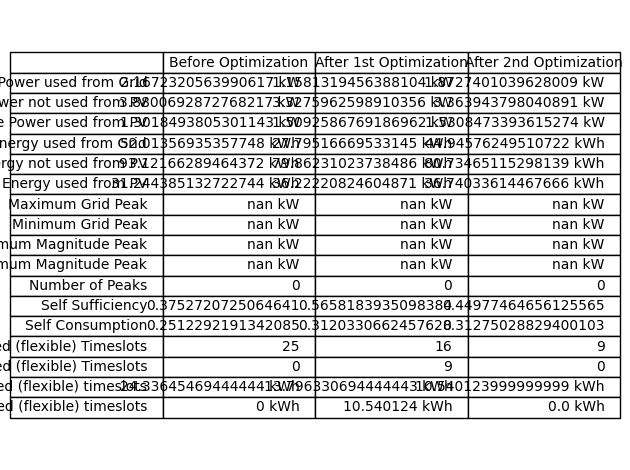

In [58]:
import numpy as np

# Calculate the metrics for the three phases (dataframes)
calculate_metrics(ev_before, ev_first, ev_second, cm.placed_timeslots, cm.not_placed_timeslots, cm.second_placed_timeslots, cm.second_not_placed_timeslots, cm.timeslots)